# **ANN**

In [2]:
# importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [3]:
#reading the data
df=pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df  # calling the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#checking the shape of the data
df.shape

(10000, 14)

In [6]:
# checking the null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
# checking for the duplicated
df.duplicated().sum().sum()

np.int64(0)

In [8]:
# checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# checking the columns names
columns=df.columns

In [10]:
columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
# checking the value count
val_columns=['Gender','Exited','Geography']

for column in val_columns:
  print(f"The value count of the {column}")
  print(df[column].value_counts())
  print("~"*30)

The value count of the Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The value count of the Exited
Exited
0    7963
1    2037
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The value count of the Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<Axes: xlabel='Gender', ylabel='CreditScore'>

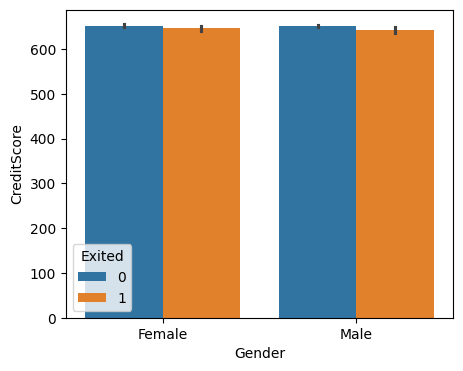

In [12]:
plt.figure(figsize=(5,4))
sns.barplot(x='Gender',y='CreditScore',hue='Exited',data=df)

Text(0.5, 1.0, 'Age vs CreditScore')

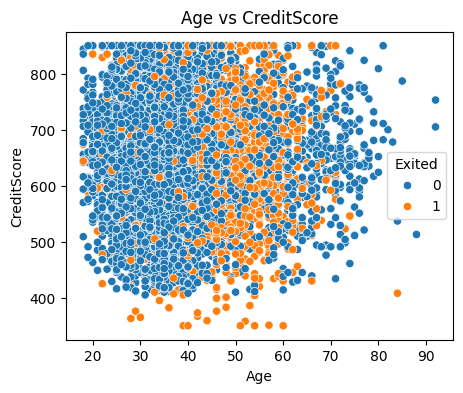

In [17]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Age',y='CreditScore',hue='Exited',data=df)
plt.xlabel='Age'
plt.ylabel='CreditScore'
plt.title('Age vs CreditScore')

Text(0.5, 1.0, 'Age vs CreditScore')

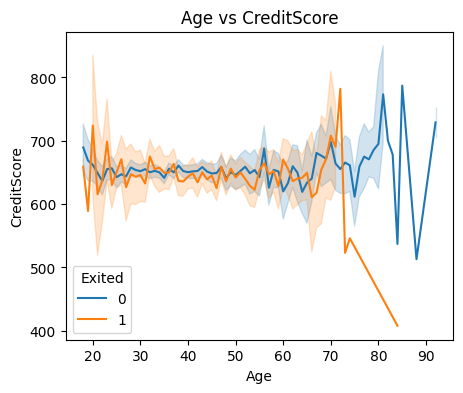

In [18]:
plt.figure(figsize=(5,4))
sns.lineplot(x='Age',y='CreditScore',hue='Exited',data=df)
plt.xlabel='Age'
plt.ylabel='CreditScore'
plt.title('Age vs CreditScore')

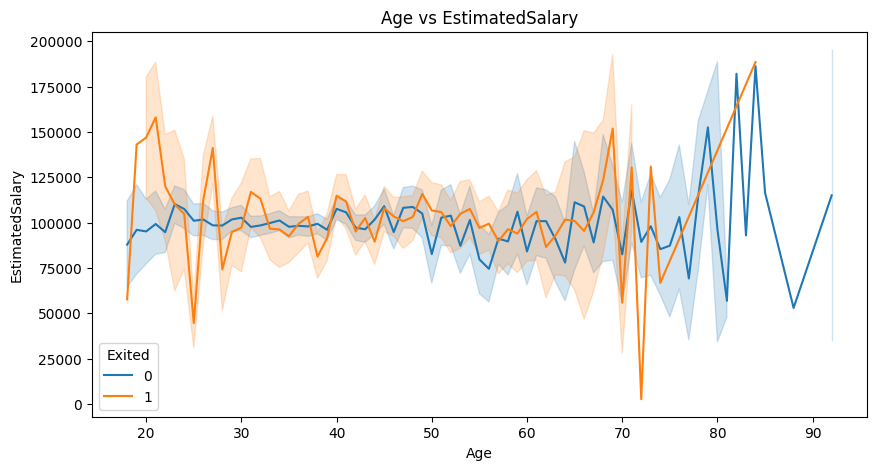

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Age',y='EstimatedSalary',hue='Exited',data=df)
plt.xlabel='Age'
plt.ylabel='EstimatedSalary'
plt.title('Age vs EstimatedSalary')
plt.show()

In [ ]:
# Droping the unwanted columns
# Droping this columns beacause they are the unique identifier in the data
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [ ]:
# Converting the cat into the numerical columns
# converting with the dummies there are the other methods like the Onehot,LabeleEncoding
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True) # Assign the result back to df

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


### **Splitting the data**

In [ ]:
# Creating the feature and the target variable
x=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
# splitting the data
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# checking the shape
Xtrain.shape

(8000, 11)

In [ ]:
#Scaling the data
sc=StandardScaler()
x_trained=sc.fit_transform(Xtrain)
x_tested=sc.transform(Xtest)

### **Model building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann=Sequential()

In [ ]:
# Creating the input , hiden , output layers in the ANN
ann.add(Dense(3,activation='sigmoid',input_dim=11)) # creating the 3 hidden with the 11 inputs
ann.add(Dense(1,activation='sigmoid')) # Output with the 1
# here we can add the hidden layers and also the no for the output and the input layers in the
# hidden layer
#ann.add(Dense(11,activation='sigmoid',input_dim=11)) Adding the weights
#ann.add(Dense(3,activation='sigmoid')) adding the 3 output layers


In [ ]:
# checking for the summary
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Adding the loss function
ann.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
# fitting the model with the 50 epochec
ann.fit(x_trained,Ytrain,epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4466
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4460
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4381
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4405
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4199
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4362
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4291
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4316
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4250
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4279
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4330
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4232
Epoch 13/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4235
Epoch 14/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4018
Epoch 15/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
# checking thhe weights for the first layer
ann.layers[0].get_weights() # 11x3=33 weights with 3 biases

[array([[ 2.69055665e-02,  1.01616025e-01,  3.81770223e-01],
        [ 3.19158340e+00,  1.12569153e-01, -3.68103480e+00],
        [-3.40869986e-02, -7.50494897e-02,  6.60337955e-02],
        [ 4.45408493e-01,  3.35281044e-01,  2.17612716e-03],
        [ 1.04914814e-01, -3.02279025e-01,  6.17184415e-02],
        [-2.35806823e-01,  7.22991526e-02, -1.82399154e-01],
        [ 2.95115650e-01, -2.14537740e+00, -9.14710462e-01],
        [-4.14332598e-01,  2.44810581e-01,  8.03369880e-02],
        [ 3.11351568e-01,  1.08746469e+00, -1.61277428e-01],
        [-3.27005684e-01,  1.54549226e-01, -1.99149594e-01],
        [-5.82222104e-01, -6.72342837e-01, -5.32245114e-02]], dtype=float32),
 array([-0.5190983 , -0.74256134,  0.7627615 ], dtype=float32)]

In [ ]:
ann.layers[1].get_weights() #Second layer

[array([[ 0.95695955],
        [ 2.1142797 ],
        [-1.7174062 ]], dtype=float32),
 array([-1.8884809], dtype=float32)]

In [ ]:
# predecting the data
y_log=ann.predict(x_tested)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
# Converting into the 1 and 0
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
# Finding the Accuracy
accuracy=accuracy_score(Ytest,y_pred)
accuracy

0.8395

We got the better score in this which is the 83% where is the good and the enough score for this model . hence our model is working well